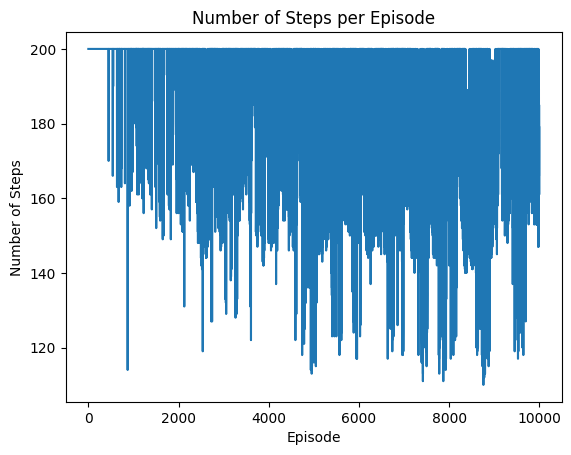

In [10]:
import gymnasium as gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Initialise the environment with increased episode length
env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = gym.wrappers.TimeLimit(env, max_episode_steps=500000)  # Increase the max steps per episode

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate

# Discretization parameters
num_buckets = (20, 20)  # Number of buckets per dimension
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Initialize Q-table
Q = np.zeros(num_buckets + (env.action_space.n,))

def discretize_state(state):
    ratios = [(state[i] - state_bounds[i][0]) / (state_bounds[i][1] - state_bounds[i][0]) for i in range(len(state))]
    new_state = [int(round((num_buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(num_buckets[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
observation = discretize_state(observation)
steps = 0 

# Number of episodes
num_episodes = 10000

# List to store the number of steps per episode
steps_per_episode = []

for episode in range(num_episodes):
    observation, info = env.reset()
    observation = discretize_state(observation)
    steps = 0
    hauteurs = []
    for _ in range(1000):
        steps += 1
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[observation])
        
        # Take action and observe
        next_observation, reward, terminated, truncated, info = env.step(action)
        next_observation = discretize_state(next_observation)
        
        # Choose next action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_observation])
        
        # Update Q-value using SARSA update rule
        Q[observation][action] += alpha * (reward + gamma * Q[next_observation][next_action] - Q[observation][action])
        
        # Update observation and action
        observation = next_observation
        action = next_action
        # Update info dictionary with custom information
        hauteurs.append(observation[0])
        # If the episode has ended then we can reset to start a new episode
        if terminated or truncated:
            break

    steps_per_episode.append(steps)

env.close()

# Plot the results
plt.figure()
plt.plot(steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title('Number of Steps per Episode')
plt.show()


In [ ]:
o